### Data Generator

Jay Urbain, PhD

In [187]:
import random
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import math
import matplotlib.pyplot as plt
# plots within notebook versus launching a separate window
%matplotlib inline 

def seq(start, stop, step): return np.arange(start, stop, step=step)    

In [188]:
seq(1, 100, 1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

### Experiments

#### Linear Relationship

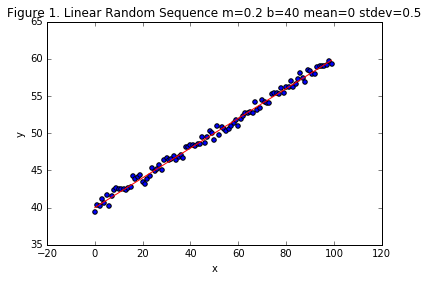

In [191]:
# Generate signal 
seqLen = 100 # sequence length
seqInc = 1   # sequence increment
b = 40       # offset
m = 0.2      # slope

# Predictor (q). Use seq for generating equally spaced sequences fast
x = seq(0, seqLen, seqInc)
#print x

y = []
for i in range(len(x)): 
    y.append( m*x[i] + b)
#print y

# Generate noise and add to the real signal (y):
noiseMean = 0 
noiseSD   = 0.5 
random.seed(20)
noise = np.random.normal(loc=noiseMean, scale=noiseSD, size=len(x))
#print noise
noisy_y = y + noise
#print noisy_y

# Plot the column at the 5 index (Labeled RM)
plt.scatter(x, noisy_y)

# Plot best fit line
plt.plot(x, m*x + b,'r', label='Best Fit Line')

# label
plt.ylabel('y')
plt.xlabel('x')
#"{} {} is {} years ".format(fname, lname, age)
plt.title('Figure 1. Linear Random Sequence m={} b={} mean={} stdev={}'.format(m, b, noiseMean, noiseSD) )


#### Non-linear relationship

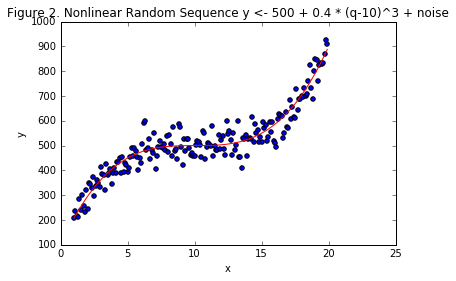

In [193]:
# signal parameters
# Predictor (q). Use seq for generating equally spaced sequences fast
x = seq(1, 20, 0.1)

#Value to predict (y):
y = []
for i in range(len(x)): 
    y.append( 500.0 + 0.4 * (x[i]-10)**3) 
#print y

# noise parameters
noiseMean = 0 
noiseSd   = 40 
noise = np.random.normal(loc=noiseMean, scale=noiseSd, size=len(x))
noisy_y = y + noise

# Plot the column at the 5 index (Labeled RM)
plt.scatter(x, noisy_y)

# Plot best fit line
plt.plot(x, y,'r', label='Best Fit Line')

# label
plt.ylabel('y')
plt.xlabel('x')
#"{} {} is {} years ".format(fname, lname, age)
plt.title('Figure 2. Nonlinear Random Sequence y <- 500 + 0.4 * (q-10)^3 + noise')


#### Higher order models

[  1.    1.1   1.2   1.3   1.4   1.5   1.6   1.7   1.8   1.9   2.    2.1
   2.2   2.3   2.4   2.5   2.6   2.7   2.8   2.9   3.    3.1   3.2   3.3
   3.4   3.5   3.6   3.7   3.8   3.9   4.    4.1   4.2   4.3   4.4   4.5
   4.6   4.7   4.8   4.9   5.    5.1   5.2   5.3   5.4   5.5   5.6   5.7
   5.8   5.9   6.    6.1   6.2   6.3   6.4   6.5   6.6   6.7   6.8   6.9
   7.    7.1   7.2   7.3   7.4   7.5   7.6   7.7   7.8   7.9   8.    8.1
   8.2   8.3   8.4   8.5   8.6   8.7   8.8   8.9   9.    9.1   9.2   9.3
   9.4   9.5   9.6   9.7   9.8   9.9  10.   10.1  10.2  10.3  10.4  10.5
  10.6  10.7  10.8  10.9  11.   11.1  11.2  11.3  11.4  11.5  11.6  11.7
  11.8  11.9  12.   12.1  12.2  12.3  12.4  12.5  12.6  12.7  12.8  12.9
  13.   13.1  13.2  13.3  13.4  13.5  13.6  13.7  13.8  13.9  14.   14.1
  14.2  14.3  14.4  14.5  14.6  14.7  14.8  14.9  15.   15.1  15.2  15.3
  15.4  15.5  15.6  15.7  15.8  15.9  16.   16.1  16.2  16.3  16.4  16.5
  16.6  16.7  16.8  16.9  17.   17.1  17.2  17.3  1

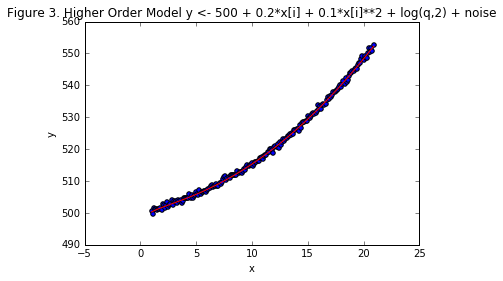

In [194]:
# signal parameters
# Predictor (q). Use seq for generating equally spaced sequences fast
x = seq(1, 21, 0.1)
print x

#Value to predict (y):
y = []
for i in range(len(x)): 
    y.append( 500 + 0.2*x[i] + 0.1*x[i]**2 + math.log(x[i],2) ) 
# noise parameters
noiseMean = 0 
noiseSd   = 80 
random.seed(20)

#Some noise is generated and added to the real signal (y):
noise = np.random.normal(loc=noiseMean, scale=noiseSD, size=len(x))
noise
noisy_y = y + noise

# Plot the column at the 5 index (Labeled RM)
plt.scatter(x, noisy_y)

# Plot best fit line
plt.plot(x, y, 'r', label='Best Fit Line')

# label
plt.ylabel('y')
plt.xlabel('x')
#"{} {} is {} years ".format(fname, lname, age)
plt.title('Figure 3. Higher Order Model y <- 500 + 0.2*x[i] + 0.1*x[i]**2 + log(q,2) + noise')

### Device data


- Column 1. Category (strings): ~250 values (337)
- Column 2. Category (string): 7 values
- Column 3. We talked about adding a lag variable (count of all occurances of 1 specific type within the second category listed above)
- Column 4. We talked about adding a lag variable (count of occurances that occurred in the past week of 1 specific type within the second category listed above)
- Column 5. We talked about adding a lag variable (count of occurances that occurred in the past month of 1 specific type within the second category listed above)
- Column 6. Age (numeric or initial date – either is fine because they can both represent an age). There will be the same number of these as there are in the first category because each age is supposed to represent the corresponding age of column 1.
 
Each one of these “instances” will also have the date that it occurred which I assume you will use to keep track of columns 3-5. Is that correct?

In [170]:
# Column 1. Category (strings): ~250 values (337)
N = 250
sequence = seq(1, N, 1)
print id

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7']
[0.7, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
0.05
1.0


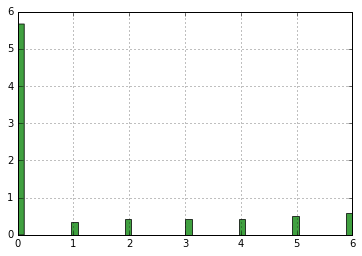

In [181]:
# Column 2. Category (string): 7 values
categories = []
for i in range(1,8):
    categories.append('c{}'.format(i) )
print categories

# category distribution
p = [0.7, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
print p
print .3/6
print sum(p)

c_select = np.random.choice(7, N, p=p)
c_list = []
for i in range(100):
    #print categories[c_select[i]]
    c_list.append(c_select[i])

# the histogram of the data
n, bins, patches = plt.hist(c_list, 50, normed=1, facecolor='green', alpha=0.75)

import matplotlib.mlab as mlab

# add a 'best fit' line
'''
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
'''
plt.grid(True)
plt.show()


#### Experiments

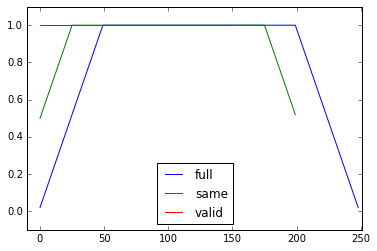

[0, 1, 1, 0, 0, 0, 1]


3

In [182]:

modes = ['full', 'same', 'valid']
for m in modes:
    plt.plot(np.convolve(np.ones((200,)), np.ones((50,))/50, mode=m));
plt.axis([-10, 251, -.1, 1.1]);
plt.legend(modes, loc='lower center');
plt.show()

np.ones(200,)

def movingaverage(interval, window_size):
    window = numpy.ones(int(window_size))/float(window_size)
    return numpy.convolve(interval, window, 'same')

#movingaverage(x, 10)

np.ones(int(10))/float(10)

r = [0,1,1,0,0,0,1]
print r
sum(r)

#Column 3. We talked about adding a lag variable (count of all occurances of 1 specific type within the second category listed above)



In [183]:
# Generate noise and add to the real signal (y):
noiseMean = 0 
noiseSD   = 2 
random.seed(20)
noise = np.random.normal(loc=noiseMean, scale=noiseSD, size=len(x))
#print noise
noisy_y = y + noise
#print noisy_y

In [184]:
import numpy as np
X = np.random.normal(size=[20,18])
P, D, Q = np.linalg.svd(X, full_matrices=False)
X_a = np.dot(np.dot(P, np.diag(D)), Q)
print(np.std(X), np.std(X_a), np.std(X - X_a))

(0.92528875926231191, 0.92528875926231191, 1.6944213799809934e-15)


In [185]:
from scipy.sparse.linalg import svds
from scipy import sparse
X = np.random.uniform(size = [40, 20])
X = scipy.sparse.csc_matrix(X)
u, s, vt = svds(X, 6, which = 'LM')

X_a = np.dot(np.dot(u, np.diag(s)), vt)
print X_a.shape

print np.std(X - X_a)

(40, 20)
0.192612719625


In [186]:
np.dot(np.dot(u, np.diag(s)), vt)

array([[  2.43578238e-01,   6.82681583e-01,   3.14322270e-01,
          4.65458825e-01,   5.22870762e-02,   6.34294647e-01,
          8.85072194e-01,   5.17316157e-01,   4.03451002e-01,
          5.11939260e-01,   7.16365269e-01,   5.48362179e-01,
          5.01163014e-01,   2.20054516e-01,   3.44260261e-01,
          7.83232614e-01,   2.73771896e-01,   2.15977797e-01,
          5.70616718e-01,   4.63549140e-01],
       [  5.23435425e-01,   8.30607530e-01,   7.69609131e-01,
          4.64462461e-01,   4.23097149e-01,   6.88288856e-01,
          9.14290701e-01,   8.56243266e-01,   7.04312312e-01,
          6.12826396e-01,   7.27598424e-01,   6.23048387e-01,
          5.21019080e-01,   6.15322005e-01,   6.95630913e-01,
          5.66792529e-01,   7.23469473e-01,   8.53613910e-01,
          4.56502707e-01,   5.01884037e-01],
       [  2.17580828e-01,   5.92659021e-01,   6.96342042e-01,
          7.75585777e-01,   3.75652232e-01,   4.12758454e-01,
          2.01661557e-01,   4.94588709e-01

In [123]:
X
#df = DataFrame(X)
#X[0].apply(numpy.sqrt) # returns DataFrame
#df.apply(numpy.sum, axis=0) # equiv to df.sum(0)
#df.apply(numpy.sum, axis=1) # equiv to df.sum(1)

<40x20 sparse matrix of type '<type 'numpy.float64'>'
	with 800 stored elements in Compressed Sparse Column format>

In [124]:
dates = pd.date_range('20130101', periods=6)


In [125]:
dates



DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [126]:
dates.apply(ma)

AttributeError: 'DatetimeIndex' object has no attribute 'apply'

In [127]:
DataFrame(range(1:10))

SyntaxError: invalid syntax (<ipython-input-127-1cd7543b6537>, line 1)

In [128]:
df2 = pd.DataFrame({ 'A' : 1.,
   ....:                      'B' : pd.Timestamp('20130102'),
   ....:                      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
   ....:                      'D' : np.array([3] * 4,dtype='int32'),
   ....:                      'E' : pd.Categorical(["test","train","test","train"]),
   ....:                      'F' : 'foo' })



In [129]:
df2

,A,B,C,D,E,F
0,1,2013-01-02,1,3,test,foo
1,1,2013-01-02,1,3,train,foo
2,1,2013-01-02,1,3,test,foo
3,1,2013-01-02,1,3,train,foo


In [131]:
df2['C']

0    1
1    1
2    1
3    1
Name: C, dtype: float32

In [132]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [133]:
df

,A,B,C,D
2013-01-01,-0.127378,1.656900,0.643635,-0.870945
2013-01-02,0.693589,0.668674,2.200313,-0.274768
2013-01-03,-0.561931,-0.484617,-0.190332,1.524808
2013-01-04,-0.702365,2.888666,0.635466,-0.029920
2013-01-05,2.030270,-1.316397,-1.637519,-0.101396
2013-01-06,0.517255,1.000165,-0.616391,0.456635


In [134]:
df['A']

2013-01-01   -0.127378
2013-01-02    0.693589
2013-01-03   -0.561931
2013-01-04   -0.702365
2013-01-05    2.030270
2013-01-06    0.517255
Freq: D, Name: A, dtype: float64

In [136]:
df.apply(np.sqrt)

,A,B,C,D
2013-01-01,NaN,1.287206,0.802268,NaN
2013-01-02,0.832820,0.817725,1.483345,NaN
2013-01-03,NaN,NaN,NaN,1.234831
2013-01-04,NaN,1.699608,0.797161,NaN
2013-01-05,1.424875,NaN,NaN,NaN
2013-01-06,0.719205,1.000083,NaN,0.675748


In [137]:
df.sum(0)

A    1.849441
B    4.413392
C    1.035171
D    0.704414
dtype: float64

In [145]:
df.apply(sum, axis=0)

A    1.849441
B    4.413392
C    1.035171
D    0.704414
dtype: float64

In [148]:
df.apply(sum, axis=1)

2013-01-01    1.302212
2013-01-02    3.287808
2013-01-03    0.287927
2013-01-04    2.791847
2013-01-05   -1.025042
2013-01-06    1.357664
Freq: D, dtype: float64

In [147]:
df['A'].apply(sum)

TypeError: 'numpy.float64' object is not iterable

In [159]:
data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'year': [2012, 2012, 2013, 2014, 2014], 
        'reports': [4, 24, 31, 2, 3],
        'coverage': [25, 94, 57, 62, 70]}
df = pd.DataFrame(data, index = ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'])
print df

print

# apply 'applies' to each element
# E.g., in this case each element in the 'reports' column
def square(x): return x*x
print df['reports'].apply(square)

print 

# make sure you are not trying to apply an aggregate function to your entire column like the following
# I.e., do not do this: print df['reports'].apply(sum)
# In this case, do something like this
print df['reports'].sum()

            coverage   name  reports  year
Cochice           25  Jason        4  2012
Pima              94  Molly       24  2012
Santa Cruz        57   Tina       31  2013
Maricopa          62   Jake        2  2014
Yuma              70    Amy        3  2014

Cochice        16
Pima          576
Santa Cruz    961
Maricopa        4
Yuma            9
Name: reports, dtype: int64

64


Cochice        16
Pima          576
Santa Cruz    961
Maricopa        4
Yuma            9
Name: reports, dtype: int64